In [1]:
%matplotlib inline
import requests
import json
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np

base_url = "http://dnd5eapi.co/api/"

## Monsters

In [2]:

monster_url = base_url + "monsters"
print(monster_url)

http://dnd5eapi.co/api/monsters


In [3]:
monster_names = requests.get(monster_url).json()
monster_names


{'count': 325,
 'results': [{'name': 'Aboleth',
   'url': 'http://www.dnd5eapi.co/api/monsters/1'},
  {'name': 'Acolyte', 'url': 'http://www.dnd5eapi.co/api/monsters/2'},
  {'name': 'Adult Black Dragon',
   'url': 'http://www.dnd5eapi.co/api/monsters/3'},
  {'name': 'Adult Blue Dracolich',
   'url': 'http://www.dnd5eapi.co/api/monsters/4'},
  {'name': 'Adult Blue Dragon',
   'url': 'http://www.dnd5eapi.co/api/monsters/5'},
  {'name': 'Adult Brass Dragon',
   'url': 'http://www.dnd5eapi.co/api/monsters/6'},
  {'name': 'Adult Bronze Dragon',
   'url': 'http://www.dnd5eapi.co/api/monsters/7'},
  {'name': 'Adult Copper Dragon',
   'url': 'http://www.dnd5eapi.co/api/monsters/8'},
  {'name': 'Adult Gold Dragon',
   'url': 'http://www.dnd5eapi.co/api/monsters/9'},
  {'name': 'Adult Green Dragon',
   'url': 'http://www.dnd5eapi.co/api/monsters/10'},
  {'name': 'Adult Red Dragon',
   'url': 'http://www.dnd5eapi.co/api/monsters/11'},
  {'name': 'Adult Silver Dragon',
   'url': 'http://www.dnd5ea

In [4]:
#step through to get monster details
monster_details = []
monurl_list = []

for monster in monster_names["results"]:
    mon_url = monster["url"]
    monurl_list.append(mon_url)
    mon_dets = requests.get(mon_url).json()
    monster_details.append(mon_dets)
pprint(monster_details)


[{'_id': '5bce91465b7768e7920181a5',
  'actions': [{'attack_bonus': 0,
               'desc': 'The aboleth makes three tentacle attacks.',
               'name': 'Multiattack'},
              {'attack_bonus': 9,
               'damage_bonus': 5,
               'damage_dice': '2d6',
               'desc': 'Melee Weapon Attack: +9 to hit, reach 10 ft., one '
                       'target. Hit: 12 (2d6 + 5) bludgeoning damage. If the '
                       'target is a creature, it must succeed on a DC 14 '
                       'Constitution saving throw or become diseased. The '
                       'disease has no effect for 1 minute and can be removed '
                       'by any magic that cures disease. After 1 minute, the '
                       "diseased creature's skin becomes translucent and "
                       "slimy, the creature can't regain hit points unless it "
                       'is underwater, and the disease can be removed only by '
                 

               'damage_dice': '2d10 + 2d8',
               'desc': 'Melee Weapon Attack:+ 15 to hit, reach 15 ft., one '
                       'target. Hit: 19 (2d10 + 8) piercing damage plus 9 '
                       '(2d8) acid damage.',
               'name': 'Bite'},
              {'attack_bonus': 15,
               'damage_bonus': 8,
               'damage_dice': '2d6',
               'desc': 'Melee Weapon Attack: +15 to hit, reach 10 ft., one '
                       'target. Hit: 15 (2d6 + 8) slashing damage.',
               'name': 'Claw'},
              {'attack_bonus': 15,
               'damage_bonus': 8,
               'damage_dice': '2d8',
               'desc': 'Melee Weapon Attack: +15 to hit, reach 20 ft ., one '
                       'target. Hit: 17 (2d8 + 8) bludgeoning damage.',
               'name': 'Tail'},
              {'attack_bonus': 0,
               'desc': "Each creature of the dragon's choice that is within "
                       '120 feet of the dr

                       'the effect is different, as detailed below. Each '
                       'creature within 500 feet of the sphinx and able to '
                       'hear the roar must make a saving throw.\n'
                       '\n'
                       'First Roar. Each creature that fails a DC 18 Wisdom '
                       'saving throw is frightened for 1 minute. A frightened '
                       'creature can repeat the saving throw at the end of '
                       'each of its turns, ending the effect on itself on a '
                       'success.\n'
                       '\n'
                       'Second Roar. Each creature that fails a DC 18 Wisdom '
                       'saving throw is deafened and frightened for 1 minute. '
                       'A frightened creature is paralyzed and can repeat the '
                       'saving throw at the end of each of its turns, ending '
                       'the effect on itself on a success.

  'special_abilities': [{'attack_bonus': 0,
                         'desc': "Magical darkness doesn't impede the devil's "
                                 'darkvision.',
                         'name': "Devil's Sight"},
                        {'attack_bonus': 0,
                         'desc': 'The devil has advantage on saving throws '
                                 'against spells and other magical effects.',
                         'name': 'Magic Resistance'},
                        {'attack_bonus': 0,
                         'desc': "The devil can't be frightened while it can "
                                 'see an allied creature within 30 feet of it.',
                         'name': 'Steadfast'}],
  'speed': '30 ft.',
  'strength': 16,
  'strength_save': 5,
  'subtype': 'devil',
  'type': 'fiend',
  'url': 'http://www.dnd5eapi.co/api/monsters/43',
  'wisdom': 11,
  'wisdom_save': 2},
 {'_id': '5bce91465b7768e7920181cd',
  'actions': [{'attack_bonus': 0,
           

               'name': 'Chain'},
              {'attack_bonus': 0,
               'desc': 'Up to four chains the devil can see within 60 feet of '
                       'it magically sprout razor-edged barbs and animate '
                       "under the devil's control, provided that the chains "
                       "aren't being worn or carried.\n"
                       'Each animated chain is an object with AC 20, 20 hit '
                       'points, resistance to piercing damage, and immunity to '
                       'psychic and thunder damage. When the devil uses '
                       'Multiattack on its turn, it can use each animated '
                       'chain to make one additional chain attack. An animated '
                       "chain can grapple one creature of its own but can't "
                       'make attacks while grappling. An animated chain '
                       'reverts to its inanimate state if reduced to 0 hit '
                       

               'desc': 'The deva magically polymorphs into a humanoid or beast '
                       'that has a challenge rating equal to or less than its '
                       'own, or back into its true form. It reverts to its '
                       'true form if it dies. Any equipment it is wearing or '
                       'carrying is absorbed or borne by the new form (the '
                       "deva's choice).\n"
                       'In a new form, the deva retains its game statistics '
                       'and ability to speak, but its AC, movement modes, '
                       'Strength, Dexterity, and special senses are replaced '
                       'by those of the new form, and it gains any statistics '
                       'and capabilities (except class features, legendary '
                       'actions, and lair actions) that the new form has but '
                       'that it lacks.',
               'name': 'Change Shape'}],
  'alignment

              {'attack_bonus': 0,
               'desc': 'Melee Weapon Attack: +5 to hit, reach 5 ft., one prone '
                       'creature. Hit: 8 (2d4 + 3) bludgeoning damage.',
               'name': 'Hooves'}],
  'alignment': 'unaligned',
  'armor_class': 10,
  'challenge_rating': 0.25,
  'charisma': 6,
  'condition_immunities': '',
  'constitution': 12,
  'damage_immunities': '',
  'damage_resistances': '',
  'damage_vulnerabilities': '',
  'dexterity': 10,
  'hit_dice': '2d10',
  'hit_points': 13,
  'index': 100,
  'intelligence': 2,
  'languages': '',
  'name': 'Elk',
  'senses': 'passive Perception 10',
  'size': 'Large',
  'special_abilities': [{'attack_bonus': 0,
                         'damage_dice': '2d6',
                         'desc': 'If the elk moves at least 20 ft. straight '
                                 'toward a target and then hits it with a ram '
                                 'attack on the same turn, the target takes an '
                        

  'actions': [{'attack_bonus': 5,
               'damage_bonus': 3,
               'damage_dice': '2d6',
               'desc': 'Melee Weapon Attack: +5 to hit, reach 5 ft., one '
                       'target. Hit: 10 (2d6 + 3) slashing damage.',
               'name': 'Tusk'}],
  'alignment': 'unaligned',
  'armor_class': 12,
  'challenge_rating': 2,
  'charisma': 5,
  'condition_immunities': '',
  'constitution': 16,
  'damage_immunities': '',
  'damage_resistances': '',
  'damage_vulnerabilities': '',
  'dexterity': 10,
  'hit_dice': '5d10',
  'hit_points': 42,
  'index': 119,
  'intelligence': 2,
  'languages': '',
  'name': 'Giant Boar',
  'senses': 'passive Perception 8',
  'size': 'Large',
  'special_abilities': [{'attack_bonus': 0,
                         'damage_dice': '2d6',
                         'desc': 'If the boar moves at least 20 ft. straight '
                                 'toward a target and then hits it with a tusk '
                                 'attack 

               'name': 'Beak'},
              {'attack_bonus': 4,
               'damage_bonus': 2,
               'damage_dice': '2d6',
               'desc': 'Melee Weapon Attack: +4 to hit, reach 5 ft., one '
                       'target. Hit: 9 (2d6 + 2) slashing damage.',
               'name': 'Talons'}],
  'alignment': 'neutral evil',
  'armor_class': 10,
  'challenge_rating': 1,
  'charisma': 7,
  'condition_immunities': '',
  'constitution': 15,
  'damage_immunities': '',
  'damage_resistances': '',
  'damage_vulnerabilities': '',
  'dexterity': 10,
  'hit_dice': '3d10',
  'hit_points': 22,
  'index': 141,
  'intelligence': 6,
  'languages': "understands Common but can't speak",
  'name': 'Giant Vulture',
  'perception': 3,
  'senses': 'passive Perception 13',
  'size': 'Large',
  'special_abilities': [{'attack_bonus': 0,
                         'desc': 'The vulture has advantage on Wisdom '
                                 '(Perception) checks that rely on sight or '
     

  'damage_immunities': 'psychic',
  'damage_resistances': 'bludgeoning, piercing, and slashing from nonmagical '
                        'weapons',
  'damage_vulnerabilities': '',
  'dexterity': 15,
  'history': 12,
  'hit_dice': '16d10',
  'hit_points': 136,
  'index': 161,
  'intelligence': 18,
  'languages': 'Common, Sphinx',
  'legendary_actions': [{'attack_bonus': 0,
                         'desc': 'The sphinx makes one claw attack.',
                         'name': 'Claw Attack'},
                        {'attack_bonus': 0,
                         'desc': 'The sphinx magically teleports, along with '
                                 'any equipment it is wearing or carrying, up '
                                 'to 120 feet to an unoccupied space it can '
                                 'see.',
                         'name': 'Teleport (Costs 2 Actions)'},
                        {'attack_bonus': 0,
                         'desc': 'The sphinx casts a spell from its list of 

               'name': 'Heavy Crossbow'},
              {'attack_bonus': 0,
               'desc': 'For 1 minute, the knight can utter a special command '
                       'or warning whenever a nonhostile creature that it can '
                       'see within 30 ft. of it makes an attack roll or a '
                       'saving throw. The creature can add a d4 to its roll '
                       'provided it can hear and understand the knight. A '
                       'creature can benefit from only one Leadership die at a '
                       'time. This effect ends if the knight is incapacitated.',
               'name': 'Leadership (Recharges after a Short or Long Rest)'}],
  'alignment': 'any alignment',
  'armor_class': 18,
  'challenge_rating': 3,
  'charisma': 15,
  'condition_immunities': '',
  'constitution': 14,
  'constitution_save': 4,
  'damage_immunities': '',
  'damage_resistances': '',
  'damage_vulnerabilities': '',
  'dexterity': 11,
  'hit_dice': '

  'index': 203,
  'intelligence': 6,
  'languages': "understands Abyssal but can't speak",
  'name': 'Minotaur Skeleton',
  'senses': 'darkvision 60 ft., passive Perception 9',
  'size': 'Large',
  'special_abilities': [{'attack_bonus': 0,
                         'damage_dice': '2d8',
                         'desc': 'If the skeleton moves at least 10 feet '
                                 'straight toward a target and then hits it '
                                 'with a gore attack on the same turn, the '
                                 'target takes an extra 9 (2d8) piercing '
                                 'damage. If the target is a creature, it must '
                                 'succeed on a DC 14 Strength saving throw or '
                                 'be pushed up to 10 feet away and knocked '
                                 'prone.',
                         'name': 'Charge'}],
  'speed': '40 ft.',
  'strength': 18,
  'subtype': '',
  'type': 'undead',
  'url

                         'desc': 'The planetar has advantage on saving throws '
                                 'against spells and other magical effects.',
                         'name': 'Magic Resistance'}],
  'speed': '40 ft., fly 120 ft.',
  'strength': 24,
  'subtype': '',
  'type': 'celestial',
  'url': 'http://www.dnd5eapi.co/api/monsters/224',
  'wisdom': 22,
  'wisdom_save': 11},
 {'_id': '5bce91465b7768e792018284',
  'actions': [{'attack_bonus': 6,
               'damage_bonus': 4,
               'damage_dice': '3d6',
               'desc': 'Melee Weapon Attack: +6 to hit, reach 10 ft., one '
                       'target. Hit: 14 (3d6 + 4) piercing damage.',
               'name': 'Bite'}],
  'alignment': 'unaligned',
  'armor_class': 13,
  'challenge_rating': 2,
  'charisma': 5,
  'condition_immunities': '',
  'constitution': 16,
  'damage_immunities': '',
  'damage_resistances': '',
  'damage_vulnerabilities': '',
  'dexterity': 15,
  'hit_dice': '8d10',
  'hit_points'

  'intelligence': 12,
  'languages': 'Common, Elvish, Sylvan',
  'name': 'Satyr',
  'perception': 2,
  'performance': 6,
  'senses': 'passive Perception 12',
  'size': 'Medium',
  'special_abilities': [{'attack_bonus': 0,
                         'desc': 'The satyr has advantage on saving throws '
                                 'against spells and other magical effects.',
                         'name': 'Magic Resistance'}],
  'speed': '40 ft.',
  'stealth': 5,
  'strength': 12,
  'subtype': '',
  'type': 'fey',
  'url': 'http://www.dnd5eapi.co/api/monsters/249',
  'wisdom': 10},
 {'_id': '5bce91465b7768e79201829e',
  'actions': [{'attack_bonus': 2,
               'damage_bonus': 1,
               'desc': 'Melee Weapon Attack: +2 to hit, reach 5 ft., one '
                       'creature. Hit: 1 piercing damage, and the target must '
                       'make a DC 9 Constitution saving throw, taking 4 (1d8) '
                       'poison damage on a failed save, or half as muc

  'url': 'http://www.dnd5eapi.co/api/monsters/271',
  'wisdom': 12},
 {'_id': '5bce91465b7768e7920182b2',
  'actions': [{'attack_bonus': 4,
               'damage_dice': '2d4',
               'desc': 'Melee Weapon Attack: +4 to hit, reach 0 ft., one '
                       "creature in the swarm's space. Hit: 5 (2d4) piercing "
                       'damage, or 2 (1d4) piercing damage if the swarm has '
                       'half of its hit points or fewer.',
               'name': 'Bites'}],
  'alignment': 'unaligned',
  'armor_class': 12,
  'challenge_rating': 0.25,
  'charisma': 4,
  'condition_immunities': 'charmed, frightened, grappled, paralyzed, '
                          'petrified, prone, restrained, stunned',
  'constitution': 10,
  'damage_immunities': '',
  'damage_resistances': 'bludgeoning, piercing, slashing',
  'damage_vulnerabilities': '',
  'dexterity': 15,
  'hit_dice': '5d8',
  'hit_points': 22,
  'index': 272,
  'intelligence': 2,
  'languages': '',
  'name': 

  'hit_points': 82,
  'index': 292,
  'intelligence': 11,
  'languages': 'the languages it knew in life',
  'name': 'Vampire Spawn',
  'perception': 3,
  'senses': 'darkvision 60 ft., passive Perception 13',
  'size': 'Medium',
  'special_abilities': [{'attack_bonus': 0,
                         'desc': 'The vampire regains 10 hit points at the '
                                 'start of its turn if it has at least 1 hit '
                                 "point and isn't in sunlight or running "
                                 'water. If the vampire takes radiant damage '
                                 'or damage from holy water, this trait '
                                 "doesn't function at the start of the "
                                 "vampire's next turn.",
                         'name': 'Regeneration'},
                        {'attack_bonus': 0,
                         'desc': 'The vampire can climb difficult surfaces, '
                                 'includin

  'special_abilities': [{'attack_bonus': 0,
                         'desc': 'The worg has advantage on Wisdom '
                                 '(Perception) checks that rely on hearing or '
                                 'smell.',
                         'name': 'Keen Hearing and Smell'}],
  'speed': '50 ft.',
  'strength': 16,
  'subtype': '',
  'type': 'monstrosity',
  'url': 'http://www.dnd5eapi.co/api/monsters/311',
  'wisdom': 11},
 {'_id': '5bce91465b7768e7920182d7',
  'actions': [{'attack_bonus': 6,
               'damage_bonus': 3,
               'damage_dice': '4d8',
               'desc': 'Melee Weapon Attack: +6 to hit, reach 5 ft., one '
                       'creature. Hit: 21 (4d8 + 3) necrotic damage. The '
                       'target must succeed on a DC 14 Constitution saving '
                       'throw or its hit point maximum is reduced by an amount '
                       'equal to the damage taken. This reduction lasts until '
                       

In [5]:
#Need to convert monster_details into a dataframe


In [6]:
#pprint(monster_details[0]["name"])

Monsternames=[]
Monstersize = []
MonsterHP = []
MonsterIntelligence = []
MonsterDexterity = []
MonsterChallengeR = []
MonsterWisdom = []
MonsterStrength = []
MonsterType = []


for x in monster_details:
    monName = x["name"]
    Monsternames.append(monName)
    monSize = x["size"]
    Monstersize.append(monSize)
    monHP = x["hit_points"]
    MonsterHP.append(monHP)
    MonInt = x["intelligence"]
    MonsterIntelligence.append(MonInt)
    MonDex = x["dexterity"]
    MonsterDexterity.append(MonDex)
    MonChal = x["challenge_rating"]
    MonsterChallengeR.append(MonChal)
    MonStr = x["strength"]
    MonsterStrength.append(MonStr)
    MonWis = x["wisdom"]
    MonsterWisdom.append(MonWis)
    MonType = x["type"]
    MonsterType.append(MonType)
    
    
      
    
Monsternames

monster = pd.DataFrame()
monster["name"] = Monsternames
monster["type"] = MonsterType
monster["size"] = Monstersize
monster["HP"] = MonsterHP
monster["Challenge Rating"] = MonsterChallengeR
monster["intelligence"] = MonsterIntelligence
monster["strength"] = MonsterStrength
monster["wisdom"] = MonsterWisdom
monster["dexterity"] = MonsterDexterity


monster.head()
monster["type"].unique()


array(['aberration', 'humanoid', 'dragon', 'undead', 'elemental',
       'monstrosity', 'construct', 'beast', 'plant', 'fiend', 'ooze',
       'fey', 'giant', 'celestial', 'swarm of Tiny beasts'], dtype=object)

In [144]:
#group by avg stats
avg_stats_hp = monster.groupby("type")["HP"].mean()
avg_stats_hp

type
aberration               97.400000
beast                    25.545455
celestial               133.666667
construct                93.777778
dragon                  202.139535
elemental                77.562500
fey                      35.166667
fiend                   115.260870
giant                   129.900000
humanoid                 37.075000
monstrosity             111.425000
ooze                     59.000000
plant                    62.333333
swarm of Tiny beasts     24.400000
undead                   64.473684
Name: HP, dtype: float64

In [147]:
plt.bar(avg_stats_hp, )
#plt.legend(loc = "upper right")

TypeError: bar() missing 1 required positional argument: 'height'

In [39]:
#bar chart
avg_stats_type.index

Index(['aberration', 'beast', 'celestial', 'construct', 'dragon', 'elemental',
       'fey', 'fiend', 'giant', 'humanoid', 'monstrosity', 'ooze', 'plant',
       'swarm of Tiny beasts', 'undead'],
      dtype='object', name='type')

In [47]:
stats_name = monster.groupby("name").sum()
stats_name 

,HP,Challenge Rating,intelligence,strength,wisdom,dexterity
name,,,,,,
Aboleth,135,10.00,18,21,15,9
Acolyte,9,0.25,10,10,14,10
Adult Black Dragon,195,14.00,14,23,13,14
Adult Blue Dracolich,225,17.00,16,25,15,10
Adult Blue Dragon,225,16.00,16,25,15,10
Adult Brass Dragon,172,13.00,14,23,13,10
Adult Bronze Dragon,212,15.00,16,25,15,10
Adult Copper Dragon,184,14.00,18,23,15,12
Adult Gold Dragon,256,17.00,16,27,15,14


In [115]:
monster_size = monster.groupby("size")["name"].count()
monster_size

size
Gargantuan     15
Huge           33
Large         105
Medium        126
Small          22
Tiny           24
Name: name, dtype: int64

In [72]:
labels=monster_size.index
labels

Index(['Gargantuan', 'Huge', 'Large', 'Medium', 'Small', 'Tiny'], dtype='object', name='size')

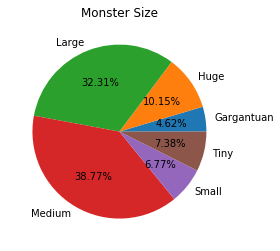

In [71]:
plt.pie(monster_size, labels=labels, autopct = "%1.2f%%")
#plt.legend(loc = "upper right")
plt.title("Monster Size")
plt.show()

In [93]:
type_cr=monster.groupby("type")["Challenge Rating"].mean()
type_cr

type
aberration               5.800000
beast                    0.948864
celestial                9.666667
construct                5.583333
dragon                  11.517442
elemental                4.015625
fey                      1.166667
fiend                    8.228261
giant                    6.900000
humanoid                 1.971875
monstrosity              5.850000
ooze                     2.125000
plant                    2.708333
swarm of Tiny beasts     0.625000
undead                   5.131579
Name: Challenge Rating, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x122dab978>,
 'caps': [<matplotlib.lines.Line2D at 0x122db3048>,
 'boxes': [<matplotlib.lines.Line2D at 0x122dab828>],
 'medians': [<matplotlib.lines.Line2D at 0x122db36d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x122db3a20>],
 'means': []}

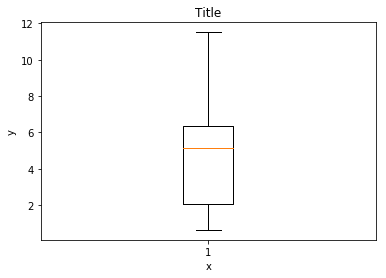

In [155]:
#Whisker Chart of Challenge Rating by Type
plt.title("Title")
plt.xlabel("x")
plt.ylabel("y")
plt.boxplot(type_cr)


In [96]:
type_hp=monster.groupby("type")["HP"].mean()
type_hp

type
aberration               97.400000
beast                    25.545455
celestial               133.666667
construct                93.777778
dragon                  202.139535
elemental                77.562500
fey                      35.166667
fiend                   115.260870
giant                   129.900000
humanoid                 37.075000
monstrosity             111.425000
ooze                     59.000000
plant                    62.333333
swarm of Tiny beasts     24.400000
undead                   64.473684
Name: HP, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1234de0f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1234de780>,
 'boxes': [<matplotlib.lines.Line2D at 0x1234d5f60>],
 'medians': [<matplotlib.lines.Line2D at 0x1234dee10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1234e7198>],
 'means': []}

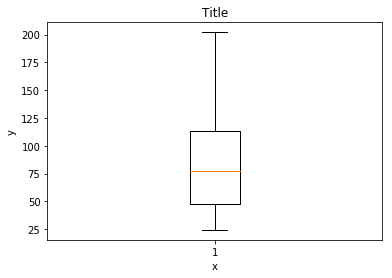

In [156]:
plt.title("Title")
plt.xlabel("x")
plt.ylabel("y")
plt.boxplot(type_hp)

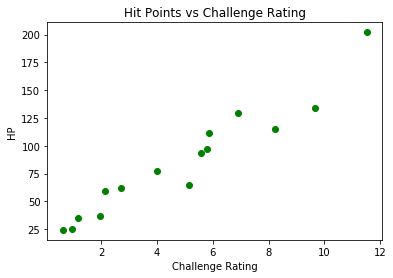

In [167]:
#Scatter of Challenge Rative and HP by Type
plt.title("Hit Points vs Challenge Rating")
plt.xlabel("Challenge Rating")
plt.ylabel("HP")
plt.scatter(type_cr, type_hp, color = ["green"])

In [187]:
size_smarts=monster.groupby("size")["intelligence"].mean()
size_smarts

size
Gargantuan    14.066667
Huge           9.575758
Large          7.342857
Medium         8.007937
Small          5.227273
Tiny           3.916667
Name: intelligence, dtype: float64

ValueError: shape mismatch: objects cannot be broadcast to a single shape

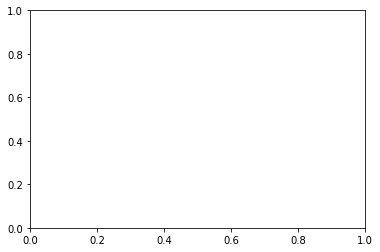

In [188]:
height = [20, 16, 12, 8, 4]
plt.bar(size_smarts, height)

In [185]:
monster.groupby("type")["intelligence"].mean()

type
aberration               9.000000
beast                    2.386364
celestial               16.666667
construct                3.888889
dragon                  13.906977
elemental                9.187500
fey                     12.500000
fiend                   12.347826
giant                    9.400000
humanoid                10.650000
monstrosity              6.600000
ooze                     1.250000
plant                    6.500000
swarm of Tiny beasts     1.400000
undead                   9.473684
Name: intelligence, dtype: float64

ValueError: shape mismatch: objects cannot be broadcast to a single shape

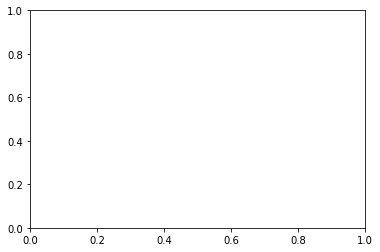

In [177]:
plt.bar(type_size, MonsterHP)